# Problema 1:

Los siguientes datos

In [2]:
import numpy as np
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [9]:
import numpy as np
import scipy.stats as stats

b_hat = np.mean(x)
a_hat = np.std(x) / np.pi

n_bootstrap = 10000
bootstrap_a = []
bootstrap_b = []

for _ in range(n_bootstrap):
    sample = np.random.choice(x, size=len(x), replace=True)
    bootstrap_a.append(np.std(sample) / np.pi)
    bootstrap_b.append(np.mean(sample))

bootstrap_a = np.array(bootstrap_a)
bootstrap_b = np.array(bootstrap_b)

intervalo_a = np.percentile(bootstrap_a, [2.5, 97.5])
intervalo_b = np.percentile(bootstrap_b, [2.5, 97.5])

print('estimación de a',a_hat, 'intervalo de confianza de a', intervalo_a)
print('estimación de b',a_hat, 'intervalo de confianza de b', intervalo_b)

estimación de a 0.5411032945498173 intervalo de confianza de a [0.47977072 0.59381993]
estimación de b 0.5411032945498173 intervalo de confianza de b [1.79452221 2.4660488 ]


# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

In [10]:
import numpy as np
from scipy import stats


n = len(x)
# promedio (estimación)
mu_hat = np.mean(x)
# 2. stdv (estimación)
s = np.std(x, ddof=1)
t_critico = stats.t.ppf(1 - 0.025, df=n-1)
se = s / np.sqrt(n)

# ahora calculamos los límites del intervalo de confianza
low = mu_hat - t_critico * se
up = mu_hat + t_critico * se

print('Estimación de mu =', mu_hat)
print(f'Intervalo de confianza del 95% para mu =', low, up)


Estimación de mu = 2.1342042433999997
Intervalo de confianza del 95% para mu = 1.795202751766069 2.4732057350339307


# Problema 3:
Un fabricante farmacéutico compra materias primas de dos proveedores diferentes. El nivel medio de impurezas es aproximadamente el mismo para ambos proveedores, pero el fabricante está preocupado por la variabilidad en la cantidad de impurezas de entre un embarque y otro. Si el nivel de impurezas tiende a variar en forma excesiva de una fuente de abastecimiento, esto podría afectar la calidad del producto final. Para comparar la variación en el porcentaje de impurezas para los dos proveedores, el fabricante selecciona diez envíos de cada uno de ellos y mide el porcentaje de impurezas de cada envío. Las varianzas muestrales fueron s2 1 = .273 y s2 2 = .094 respectivamente. Forme un intervalo de confianza de 95% para la relación entre las varianzas poblacionales reales.

In [12]:
import scipy.stats as stats

s1_cuadrada = 0.273
s2_cuadrada = 0.094
n1 = 10
n2 = 10
alpha = 0.05

gl1 = n1 - 1
gl2 = n2 - 1

razon_var = s1_cuadrada / s2_cuadrada

F_inf = stats.f.ppf(alpha / 2, gl1, gl2)
F_sup = stats.f.ppf(1 - alpha / 2, gl2, gl1)

IC_inf = razon_var / F_sup
IC_sup = razon_var / F_inf

print("Razón entre las varianzas:", round(razon_var, 3))
print("EL intervalo de confianza del 95% es:", 
      "({0}, {1})".format(round(IC_inf, 3), round(IC_sup, 3)))

Razón entre las varianzas: 2.904
EL intervalo de confianza del 95% es: (0.721, 11.693)


# Problema 4:
Una encuesta a 415 ejecutivos corporativos, de gobierno y contadores de la Financial Accounting Foundation encontró que 278 consideraban el flujo de caja (lo contrario de ganancias por acción, etc.) como el indicador más importante de la salud financiera de una compañía. Suponga que estos 415 ejecutivos constituyen una muestra aleatoria de la población de todos los ejecutivos. Use los datos para hallar un intervalo de confianza de 95% para la fracción de todos los ejecutivos corporativos que consideran que el flujo de caja es la medida más importante de la salud financiera de una compañía.

In [13]:
import math
import scipy.stats as stats

n = 415
x = 278

p_muestral = x / n

nivel_confianza = 0.95
z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

margen_error = z * math.sqrt((p_muestral * (1 - p_muestral)) / n)

lim_inf = p_muestral - margen_error
lim_sup = p_muestral + margen_error

print("Intervalo de confianza 95%: [", round(lim_inf, 4), ",", round(lim_sup, 4), "]")

Intervalo de confianza 95%: [ 0.6246 , 0.7151 ]


# Problema 5:
Se sabe que la probabilidad p de obtener una cara al lanzar al aire una moneda desbalanceada es 1/ 4 o 3/ 4. La moneda es lanzada dos veces al aire y se observa un valor para Y, el número de caras. Para cada valor posible de Y, ¿cuál de los dos valores para p (1/ 4 o 3/ 4) maximiza la probabilidad de que Y = y? Dependiendo del valor de y observado realmente, En otras palabras ¿cuál es el MLE de p?

In [14]:
from math import comb

def probabilidad(p, y):
    return comb(2, y) * (p**y) * ((1-p)**(2-y))

def mle(Y):
    prob_p1 = probabilidad(1/4, Y)
    prob_p2 = probabilidad(3/4, Y)
    
    if prob_p1 > prob_p2:
        return 1/4
    elif prob_p2 > prob_p1:
        return 3/4
    else:
        return "null"

for Y in [0, 1, 2]:
    p_mle = mle(Y)
    print("SI Y =", Y, ", MLE =", p_mle)

SI Y = 0 , MLE = 0.25
SI Y = 1 , MLE = null
SI Y = 2 , MLE = 0.75


# Problema 6:
Un examen de lectura se aplica a alumnos de sexto año en tres grandes escuelas primarias. Se considera que las calificaciones del examen en cada escuela tienen distribuciones normales con medias desconocidas $\mu_1, \mu_2, \mu_3$, respectivamente, y varianza común desconocida $\sigma^2(\sigma²_1 = \sigma²_2 = \sigma^2_3 = \sigma^2)$. Usando los datos de la tabla siguiente en muestras aleatorias independientes de cada escuela, pruebe si existe evidencia de una diferencia entre m1 y m2. Use a = .05.

Escuela I : $n_{1} = 10, \sum x_{i}^{2} = 36950 , \bar{x}= 60$
Escuela II : $n_{2} = 10, \sum y_{i}^{2} = 25850 , \bar{y}= 50$
Escuela III : $n_{3} = 10, \sum w_{i}^{2} = 49900 , \bar{x}= 70$


In [32]:
import numpy as np
from scipy import stats

n1, n2, n3 = 10, 10, 10
x_bar_1, x_bar_2, x_bar_3 = 60, 50, 70
sum_x_sq_1, sum_x_sq_2, sum_x_sq_3 = 36950, 25850, 49900

sum_x_1 = x_bar_1 * n1
sum_x_2 = x_bar_2 * n2
sum_x_3 = x_bar_3 * n3

s1_sq = (sum_x_sq_1 - (sum_x_1**2 / n1)) / (n1 - 1)
s2_sq = (sum_x_sq_2 - (sum_x_2**2 / n2)) / (n2 - 1)
s3_sq = (sum_x_sq_3 - (sum_x_3**2 / n3)) / (n3 - 1)

sp_sq_12 = ((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2)
sp_sq_13 = ((n1 - 1) * s1_sq + (n3 - 1) * s3_sq) / (n1 + n3 - 2)
sp_sq_23 = ((n2 - 1) * s2_sq + (n3 - 1) * s3_sq) / (n2 + n3 - 2)

t_stat_12 = (x_bar_1 - x_bar_2) / np.sqrt(sp_sq_12 * (1/n1 + 1/n2))
t_stat_13 = (x_bar_1 - x_bar_3) / np.sqrt(sp_sq_13 * (1/n1 + 1/n3))
t_stat_23 = (x_bar_2 - x_bar_3) / np.sqrt(sp_sq_23 * (1/n2 + 1/n3))

alpha = 0.05

df_12 = n1 + n2 - 2
t_critical_12 = stats.t.ppf(1 - alpha / 2, df_12)

df_13 = n1 + n3 - 2
t_critical_13 = stats.t.ppf(1 - alpha / 2, df_13)

df_23 = n2 + n3 - 2
t_critical_23 = stats.t.ppf(1 - alpha / 2, df_23)

print("escuelas 1 y 2:","\nt I-II:", t_stat_12, "tc I-II:", t_critical_12)
if abs(t_stat_12) > t_critical_12:
    print("Rechazamos H0: I y II diferentes")
else:
    print("No rechazamos H0: I y II no diferentes")

print("escuelas 1 y 3:","\nt I-III:", t_stat_13, "tc I-III:", t_critical_13)
if abs(t_stat_13) > t_critical_13:
    print("Rechazamos H0: I y III diferentes")
else:
    print("No rechazamos H0: I y III no diferentes")

print("escuelas 2 y 3:","\nt II-III:", t_stat_23, "tc II-III:", t_critical_23)
if abs(t_stat_23) > t_critical_23:
    print("Rechazamos H0: II y III diferentes")
else:
    print("No rechazamos H0: II y III no diferentes")

escuelas 1 y 2: 
t I-II: 2.23606797749979 tc I-II: 2.10092204024096
Rechazamos H0: I y II diferentes
escuelas 1 y 3: 
t I-III: -2.2056438662814233 tc I-III: 2.10092204024096
Rechazamos H0: I y III diferentes
escuelas 2 y 3: 
t II-III: -4.535573676110727 tc II-III: 2.10092204024096
Rechazamos H0: II y III diferentes


# Problema 7:
¿Qué eficiencia de combustión debe esperar el propietario de una casa de un horno de petróleo? La EPA indica que 80% o más es excelente, 75% a 79% es buena, 70% a 74% es regular y debajo de 70% es mala. Un contratista de sistemas de calefacción doméstica, que vende dos marcas de calentadores de petróleo (llamémosles A y B) decidió comparar sus eficiencias medias al analizar las eficiencias de 8 calentadores del tipo A y 6 del tipo B. Los porcentajes de eficiencia resultantes para los 14 calentadores se muestran en la tabla siguiente.

Tipo A 72 78 73 69 75 74 69 75

Tipo B 78 76 81 74 82 75

a ¿Los datos proporcionan suficiente evidencia para indicar una diferencia en las eficiencias medias para las dos marcas de calentadores domésticos? Encuentre el valor p aproximado para la prueba e interprete su valor. 

b Determine un intervalo de confianza de 90% para (mA − mB) e interprete el resultado.

In [22]:
import numpy as np
from scipy import stats

a = np.array([72, 78, 73, 69, 75, 74, 69, 75])
b = np.array([78, 76, 81, 74, 82, 75])

m_a, m_b = np.mean(a), np.mean(b)
d_a, d_b = np.std(a, ddof=1), np.std(b, ddof=1)

n_a, n_b = len(a), len(b)

t_stat, p_val = stats.ttest_ind(a, b, equal_var=False)

df = (((d_a**2 / n_a) + (d_b**2 / n_b))**2) / \
     (((d_a**2 / n_a)**2 / (n_a - 1)) + ((d_b**2 / n_b)**2 / (n_b - 1)))

dif = m_a - m_b
se = np.sqrt((d_a**2 / n_a) + (d_b**2 / n_b))
t_crit = stats.t.ppf(0.95, df)

me = t_crit * se
int_conf = (dif - me, dif + me)

print("t:", round(t_stat, 3), "p:", round(p_val, 3))
if p_val < 0.05:
    print("Rechazamos H0. No hay evidencia suficiente.")
else:
    print("No rechazamos H0.")

print("IC 90% dif medias:", round(int_conf[0], 3), ",", round(int_conf[1], 3))


t: -2.634 p: 0.024
Rechazamos H0. No hay evidencia suficiente
IC 90% dif medias: -7.649 , -1.434


# Problema 8: 
Los datos de la siguiente tabla muestran lecturas en pies-libras de la resistencia al impacto de dos clases de material de empaque, tipo A y tipo B. Determine si la información sugiere una diferencia en la resistencia media entre las dos clases de material. Realice la prueba con un nivel de significancia a = .10.

A     &nbsp; B \
1.25 &nbsp; .89 \
1.16 &nbsp; 1.01 \
1.33 &nbsp; .97 \
1.15 &nbsp; .95 \
1.23 &nbsp; .94 \
1.20 &nbsp; 1.02 \
1.32 &nbsp; .98 \
1.28 &nbsp; 1.06 \
1.21 &nbsp; .98


In [34]:
import numpy as np
from scipy import stats

A = np.array([1.25, 1.16, 1.33, 1.15, 1.23, 1.20, 1.32, 1.28, 1.21])
B = np.array([0.89, 1.01, 0.97, 0.95, 0.94, 1.02, 0.98, 1.06, 0.98])

alpha = 0.10
t_stat, p_value = stats.ttest_ind(A, B, equal_var=False)

if p_value < alpha:
    print("Rechazamos la hipótesis nula, sí existe diferencia significativa entre medias.")
else:
    print("No rechazamos la hipótesis nula: No hay diferencia significativa entre medias.")

print("t:", t_stat)
print("p:", p_value)

Rechazamos la hipótesis nula, sí existe diferencia significativa entre medias.
t: 9.564131954889966
p: 8.96863921890718e-08


# Problema 9:
Los datos de la siguiente tabla proporcionan las millas por galón recorridas por un automóvil de prueba cuando utiliza gasolinas de niveles variables de octanaje.

Millas por galón (y) &nbsp; Octano (x) \
13.0 &nbsp;89 \
13.2 &nbsp;93 \
13.0 &nbsp;87 \
 13.6 &nbsp;90 \
13.3 &nbsp;89 \
 13.8 &nbsp;95  \
 14.1 &nbsp;100 \
 14.0 &nbsp;98

 a Calcule el valor de r. 
 
 b ¿Los datos dan suficiente evidencia para indicar que el nivel de octanaje y las millas por galón son dependientes? Obtenga el nivel de significancia alcanzado, e indique su conclusión si desea realizar una prueba en el nivel de a = .05.

In [39]:
import numpy as np
from scipy import stats

x = np.array([89, 93, 87, 90, 89, 95, 100, 98])
y = np.array([13.0, 13.2, 13.0, 13.6, 13.3, 13.8, 14.1, 14.0])

r, p_valor = stats.pearsonr(x, y)

n = len(x)
df = n - 2
t_calculado = r * np.sqrt(df) / np.sqrt(1 - r**2)

alpha = 0.05
t_critico = stats.t.ppf(1 - alpha/2, df)

print("a) r= %.3f" % r)
print("p= %.3f" % p_valor)
print("\nb) Sí son evidencia. Si usamos alpha = 0.05 > 0.003 el resultado seria el mismo, rechazar H0. \nt calculado: %.3f" % t_calculado)
print("t crítico: %.3f" % t_critico)

if abs(t_calculado) > t_critico:
    print("Rechazamos H0: Correlación significativa.")
else:
    print("No rechazamos H0: No hay correlación suficiente.")

a) r= 0.891
p= 0.003

b) Sí son evidencia. Si usamos alpha = 0.05 > 0.003 el resultado seria el mismo, rechazar H0. 
t calculado: 4.818
t crítico: 2.447
Rechazamos H0: Correlación significativa.


# Problema 10:
Se realizó un experimento para determinar el efecto de presión y temperatura en el rendimiento de una sustancia química. Se emplearon dos niveles de presión (en libras por pulgada cuadrada, psi) y tres de temperatura:

Presión: 50 , 80
Temperatura (F) : 100, 200, 300

Una prueba del experimento en cada combinación de temperatura-presión dio como resultado los datos que aparecen en la siguiente tabla.

Rendimiento &nbsp; Presión &nbsp; Temperatura\
21 &nbsp;50&nbsp; 100 \
23 &nbsp;50 &nbsp;200 \
26 &nbsp;50 &nbsp;300 \
22 &nbsp;80 &nbsp;100 \
23 &nbsp;80 &nbsp;200 \
28 &nbsp;80&nbsp; 300

a Ajuste el modelo $Y = \beta_{0} +\beta_1x_1 +\beta_2x_2 +\beta_3x_2^{2} + \epsilon$, donde $x_1$ = presión y $x_2$ = temperatura. 

b Compruebe si $\beta_3$ difiere considerablemente de cero, con $\alpha$ = .05. 

c Pruebe la hipótesis de que la temperatura no afecta el rendimiento, con $\alpha$ = .05.

In [48]:
import statsmodels.api as sm
import pandas as pd

data = {
    'Y': [21, 23, 26, 22, 23, 28],
    'x1': [50, 50, 50, 80, 80, 80],
    'x2': [100, 200, 300, 100, 200, 300],
}

df = pd.DataFrame(data)
df['x2_squared'] = df['x2'] ** 2

X = df[['x1', 'x2', 'x2_squared']]
X = sm.add_constant(X)
y = df['Y']

modelo = sm.OLS(y, X).fit()
print('parametros', modelo.params)
print('\np valores', modelo.pvalues)
p_vals = modelo.pvalues

# Inciso a
print("\nInciso a: Modelo ajustado:")
print(f"Y = {modelo.params['const']:.4f} + {modelo.params['x1']:.4f}*x1 + {modelo.params['x2']:.4f}*x2 + {modelo.params['x2_squared']:.4f}*x2^2")

# Inciso b
if p_vals['x2_squared'] < 0.05:
    print("\nInciso b: Se rechaza H0. β3 (temperatura cuadrada) es significativamente diferente de cero.")
else:
    print("\nInciso b: No se rechaza H0. β3 (temperatura cuadrada) no es significativamente diferente de cero.")

# Inciso c
if p_vals['x2'] < 0.05:
    print("\nInciso c: Se rechaza H0. La temperatura tiene un efecto significativo en el rendimiento.")
else:
    print("\nInciso c: No se rechaza H0. La temperatura no tiene un efecto significativo en el rendimiento.")

parametros const         20.333333
x1             0.033333
x2            -0.022500
x2_squared     0.000125
dtype: float64

p valores const         0.014932
x1            0.225403
x2            0.459242
x2_squared    0.178005
dtype: float64

Inciso a: Modelo ajustado:
Y = 20.3333 + 0.0333*x1 + -0.0225*x2 + 0.0001*x2^2

Inciso b: No se rechaza H0. β3 (temperatura cuadrada) no es significativamente diferente de cero.

Inciso c: No se rechaza H0. La temperatura no tiene un efecto significativo en el rendimiento.


# Problema 11:
Los datos de la siguiente tabla provienen de la comparación de los porcentajes de crecimiento para bacterias tipos A y B. El crecimiento Y registrado en cinco puntos igualmente espaciados (y codificados) de tiempo se muestra en la tabla.

Tiempo codificado : -2, -1, 0 , 1, 2 \
Bacteria A : 8.0, 9.0, 9.1 , 10.2, 10.4\
Bacteria B : 10.0, 10.3, 12.2, 12.6, 13.9

a Ajuste el modelo lineal $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$ a los n = 10 puntos. Sea $x_1$ = 1 si el punto se refiere a bacterias tipo B y sea $x_1$ = 0 si el punto se refiere al tipo A. Sea $x_2$ = tiempo codificado. 

b Grafique los puntos y las dos rectas de crecimiento. Observe que b3 es la diferencia entre las pendientes de las dos rectas y representa la interacción tiempo-bacteria. 

c Prediga el crecimiento del tipo A en el tiempo $x_2$ = 0 y compare la respuesta con la gráfica. Repita el proceso para el tipo B.

d ¿Los datos presentan suficiente evidencia para indicar una diferencia en los porcentajes de crecimiento para los dos tipos de bacteria?

In [55]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

tiempo_codificado = np.array([-2, -1, 0, 1, 2])
bacteria_A = np.array([8.0, 9.0, 9.1, 10.2, 10.4])
bacteria_B = np.array([10.0, 10.3, 12.2, 12.6, 13.9])

x1_A = np.zeros(len(tiempo_codificado))
x1_B = np.ones(len(tiempo_codificado))

X_A = np.column_stack((x1_A, tiempo_codificado, x1_A * tiempo_codificado))
X_B = np.column_stack((x1_B, tiempo_codificado, x1_B * tiempo_codificado))

X = np.vstack((X_A, X_B))
Y = np.concatenate((bacteria_A, bacteria_B))

X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print('Inciso a \n\nParámetros del modelo', results.params)
print('\n \n La ecuación es y = 9.3400 + 2.4600x_1 +0.6000x_2 +0.4100x_3')

Inciso a 

Parámetros del modelo [9.34 2.46 0.6  0.41]

 
 La ecuación es y = 9.3400 + 2.4600x_1 +0.6000x_2 +0.4100x_3


Inciso b


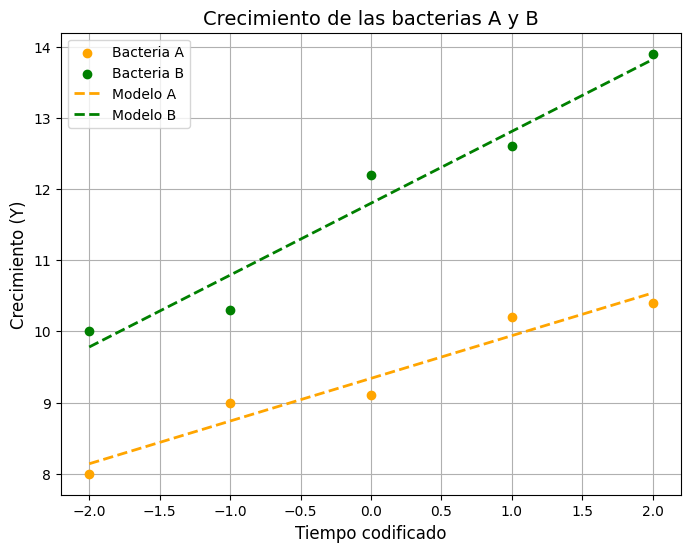

In [62]:
import matplotlib.pyplot as plt 
tiempo = np.array([-2, -1, 0, 1, 2])
bacteria_A = np.array([8.0, 9.0, 9.1, 10.2, 10.4])
bacteria_B = np.array([10.0, 10.3, 12.2, 12.6, 13.9])

beta_0 = 9.3400
beta_1 = 2.4600
beta_2 = 0.6000
beta_3 = 0.4100

Y_A = beta_0 + beta_2 * tiempo
Y_B = beta_0 + beta_1 + beta_2 * tiempo + beta_3 * tiempo

plt.figure(figsize=(8, 6))
plt.scatter(tiempo, bacteria_A, color='orange', label='Bacteria A', zorder=5)
plt.scatter(tiempo, bacteria_B, color='green', label='Bacteria B', zorder=5)
plt.plot(tiempo, Y_A, color='orange', linestyle='--', label='Modelo A', linewidth=2)
plt.plot(tiempo, Y_B, color='green', linestyle='--', label='Modelo B', linewidth=2)

plt.title('Crecimiento de las bacterias A y B', fontsize=14)
plt.xlabel('Tiempo codificado', fontsize=12)
plt.ylabel('Crecimiento (Y)', fontsize=12)

print('Inciso b')
plt.legend()
plt.grid(True)
plt.show()


Inciso c

Predicción para Bacteria A en x2 = 0: 9.34
Valor real para Bacteria A en x2 = 0: 9.1
Predicción para Bacteria B en x2 = 0: 11.8
Valor real para Bacteria B en x2 = 0: 12.2


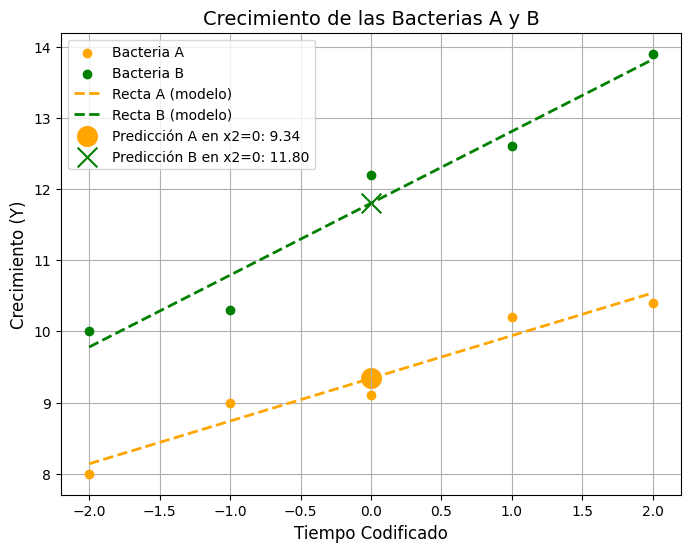

In [68]:
x2 = 0
x1_A = 0
Y_A_pred = beta_0 + beta_2 * x2

x1_B = 1
Y_B_pred = beta_0 + beta_1 + beta_2 * x2 + beta_3 * x1_B * x2

Y_A_real = bacteria_A[2]
Y_B_real = bacteria_B[2]
print('Inciso c\n')
print(f"Predicción para Bacteria A en x2 = 0: {Y_A_pred}")
print(f"Valor real para Bacteria A en x2 = 0: {Y_A_real}")
print(f"Predicción para Bacteria B en x2 = 0: {Y_B_pred}")
print(f"Valor real para Bacteria B en x2 = 0: {Y_B_real}")

plt.figure(figsize=(8, 6))
plt.scatter(tiempo, bacteria_A, color='orange', label='Bacteria A', zorder=5)
plt.scatter(tiempo, bacteria_B, color='green', label='Bacteria B', zorder=5)

Y_A_line = beta_0 + beta_2 * tiempo
Y_B_line = beta_0 + beta_1 + beta_2 * tiempo + beta_3 * tiempo

plt.plot(tiempo, Y_A_line, color='orange', linestyle='--', label='Recta A (modelo)', linewidth=2)
plt.plot(tiempo, Y_B_line, color='green', linestyle='--', label='Recta B (modelo)', linewidth=2)

plt.title('Crecimiento de las Bacterias A y B', fontsize=14)
plt.xlabel('Tiempo Codificado', fontsize=12)
plt.ylabel('Crecimiento (Y)', fontsize=12)

plt.scatter(0, Y_A_pred, color='orange', marker='o', s=200, label=f'Predicción A en x2=0: {Y_A_pred:.2f}')
plt.scatter(0, Y_B_pred, color='green', marker='x', s=200, label=f'Predicción B en x2=0: {Y_B_pred:.2f}')

plt.legend()
plt.grid(True)
plt.show()


In [74]:
import statsmodels.api as sm

x1 = np.array([0, 0, 0, 1, 1])
x2 = tiempo
Y = np.concatenate([bacteria_A, bacteria_B])

X = np.column_stack((np.ones(len(x1)*2), np.concatenate([x1, x1]), np.concatenate([x2, x2]), np.concatenate([x1*x2, x1*x2])))

model = sm.OLS(Y, X)
results = model.fit()
print(results.params)
print(results.pvalues)

p_value_interaction = results.pvalues[3]
print(f"Valor p para el coeficiente de interacción (beta3): {p_value_interaction}")

alpha = 0.05

if p_value_interaction < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre las bacterias A y B.")
else:
    print("No rechazamos la hipótesis nula: No hay evidencia suficiente para indicar una diferencia en los porcentajes de crecimiento.")


[10.59166667  0.05833333  0.825      -0.075     ]
[6.36230292e-05 9.84327611e-01 3.60792986e-01 9.69227205e-01]
Valor p para el coeficiente de interacción (beta3): 0.9692272050471998
No rechazamos la hipótesis nula: No hay evidencia suficiente para indicar una diferencia en los porcentajes de crecimiento.


# Problema 12:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

In [79]:
import scipy.stats as stats

# No hay datos del grupo C en el csv

calificaciones = {'Grupo': ['Grupo A', 'Grupo A', 'Grupo A', 'Grupo A', 'Grupo A', 'Grupo A',
                'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B'],
                 'Datos': [5.8, 3.1, 7.2, 2.6, 6.7, 4.5, 1.9, 8.5, 4.3, 6.8, 2.1, 7.4]}

calificaciones = pd.DataFrame(calificaciones)

a = calificaciones[calificaciones['Grupo'] == 'Grupo A']['Datos']
b = calificaciones[calificaciones['Grupo'] == 'Grupo B']['Datos']
f, p_valor = stats.f_oneway(a,b)

print(f'Valor del estadístico F =', f)
print(f'Valor p =', p_valor)

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("Aceptamos la hipótesis nula: no hay diferencia entre las calificaciones del grupo A y B.")


Valor del estadístico F = 0.017511360676141122
Valor p = 0.8973476766572029
Aceptamos la hipótesis nula: no hay diferencia entre las calificaciones del grupo A y B.


# Problema 13:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótesis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

inciso a 
Viendo los gráficos Q-Q podemos pensar que sí son normales

Prueba de normalidad Shapiro-Wilk (A)): p-valor =  0.5551977358822471
Prueba de normalidad Shapiro-Wilk (B)): p-valor =  0.34388057905496955

usando alpha de 0.05, vemos que el p valor de A y de B es mayor, entonces no rechazamos la hipotesis nula, son normales.



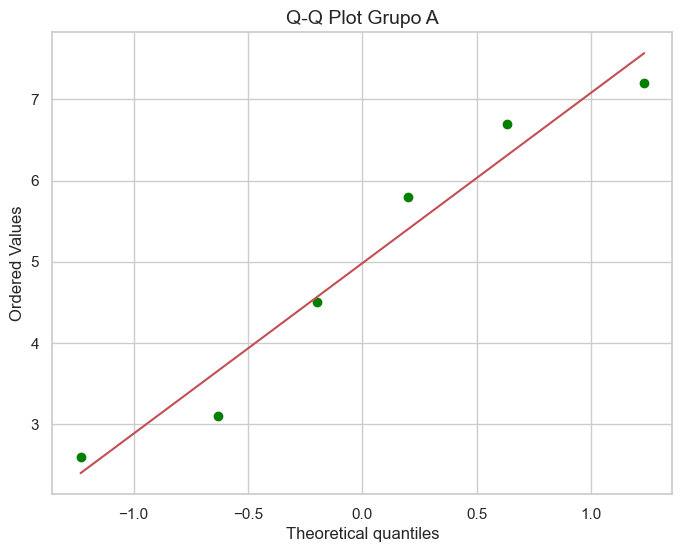

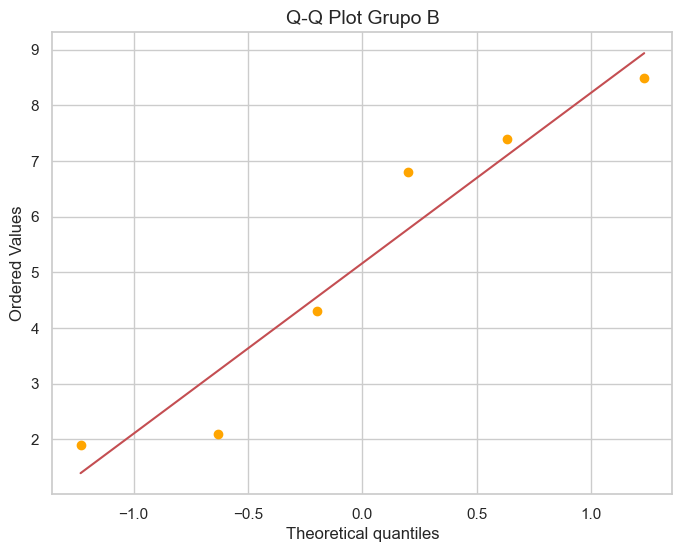

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = {
    'Grupo': ['Grupo A', 'Grupo A', 'Grupo A', 'Grupo A', 'Grupo A', 'Grupo A',
              'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B', 'Grupo B'],
    'Datos': [5.8, 3.1, 7.2, 2.6, 6.7, 4.5, 1.9, 8.5, 4.3, 6.8, 2.1, 7.4]
}
df = pd.DataFrame(data)


print('inciso a \nViendo los gráficos Q-Q podemos pensar que sí son normales\n')

# Prueba de normalidad (prueba de hipótesis del inciso a)
shapiro_A = stats.shapiro(df[df['Grupo'] == 'Grupo A']['Datos'])
shapiro_B = stats.shapiro(df[df['Grupo'] == 'Grupo B']['Datos'])

print("Prueba de normalidad Shapiro-Wilk (A)): p-valor = ", shapiro_A.pvalue)
print("Prueba de normalidad Shapiro-Wilk (B)): p-valor = ", shapiro_B.pvalue)

print('\nusando alpha de 0.05, vemos que el p valor de A y de B es mayor, entonces no rechazamos la hipotesis nula, son normales.\n')

plt.figure(figsize=(8, 6))
stats.probplot(df[df['Grupo'] == 'Grupo A']['Datos'], dist="norm", plot=plt)
plt.title("Q-Q Plot Grupo A", fontsize=14)
plt.gca().get_lines()[0].set_color('green')  # Cambiar color de la línea para Grupo A
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(df[df['Grupo'] == 'Grupo B']['Datos'], dist="norm", plot=plt)
plt.title("Q-Q Plot Grupo B", fontsize=14)
plt.gca().get_lines()[0].set_color('orange')  # Cambiar color de la línea para Grupo B
plt.show()


In [98]:
mann_whitney = stats.mannwhitneyu(df[df['Grupo'] == 'Grupo A']['Datos'], df[df['Grupo'] == 'Grupo B']['Datos'])
print('prueba (no paramétrica) Mann-Whitney')
print("p-valor = ", mann_whitney.pvalue)
print('si elegimos alpha de 0.05 vemos que el p valor es mayor, y por lo tanto aceptamos la hipótesis nula de que no hya siferencia significativa entre las medianas')

prueba (no paramétrica) Mann-Whitney
p-valor =  0.9372294372294373
si elegimos alpha de 0.05 vemos que el p valor es mayor, y por lo tanto aceptamos la hipótesis nula de que no hya siferencia significativa entre las medianas
